In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('advertising.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDataset Description:")
print(df.describe())
print("\ndescribe dataset:")
print(df.describe())

Dataset Shape: (200, 4)

First few rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Dataset Description:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.

In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

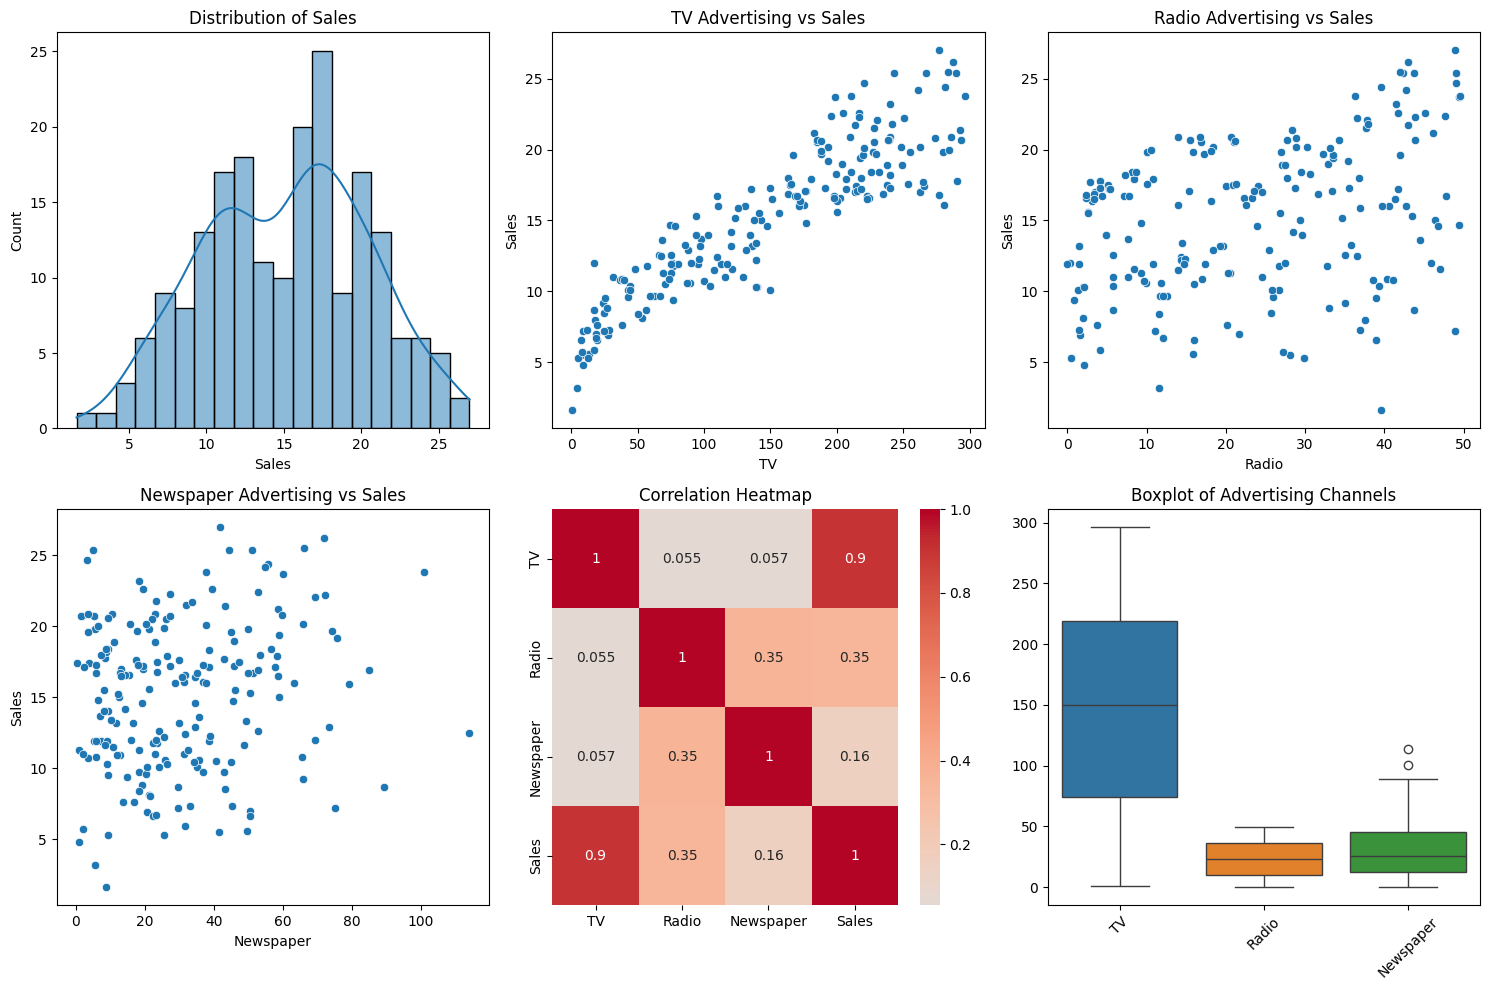

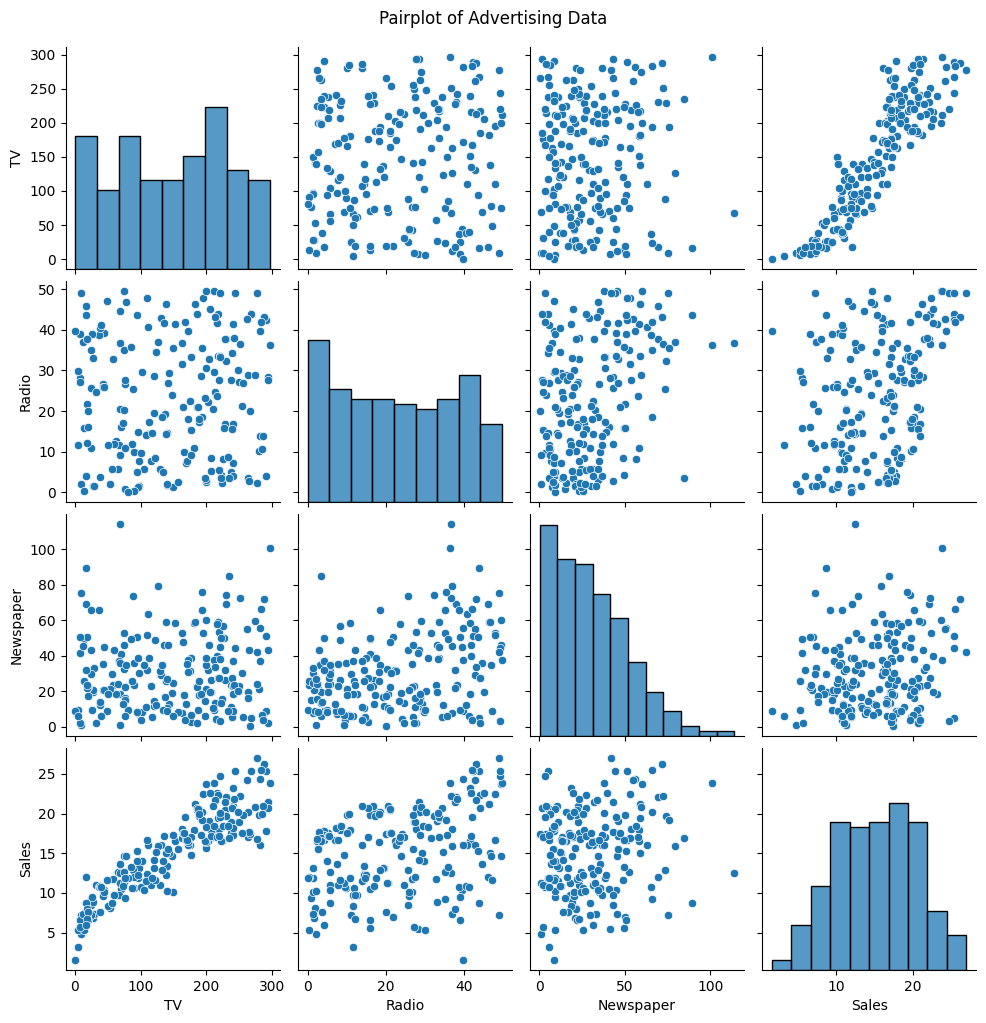

In [4]:
# Exploratory Data Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')

plt.subplot(2, 3, 2)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs Sales')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs Sales')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs Sales')

plt.subplot(2, 3, 5)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.subplot(2, 3, 6)
df_box = df.drop('Sales', axis=1)
sns.boxplot(data=df_box)
plt.title('Boxplot of Advertising Channels')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

sns.pairplot(df)
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()

In [5]:
# Data Preprocessing
X = df.drop('Sales', axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (160, 3)
Testing set shape: (40, 3)


Linear Regression:
  RMSE: 1.7052
  MAE: 1.2748
  R²: 0.9059
  CV R²: 0.8880

Ridge Regression:
  RMSE: 1.7074
  MAE: 1.2734
  R²: 0.9057
  CV R²: 0.8879

Lasso Regression:
  RMSE: 2.3439
  MAE: 1.7891
  R²: 0.8222
  CV R²: 0.8014

Random Forest:
  RMSE: 1.1987
  MAE: 0.9171
  R²: 0.9535
  CV R²: 0.9322

Gradient Boosting:
  RMSE: 1.1293
  MAE: 0.8411
  R²: 0.9587
  CV R²: 0.9230

Best Model: Gradient Boosting with R²: 0.9587


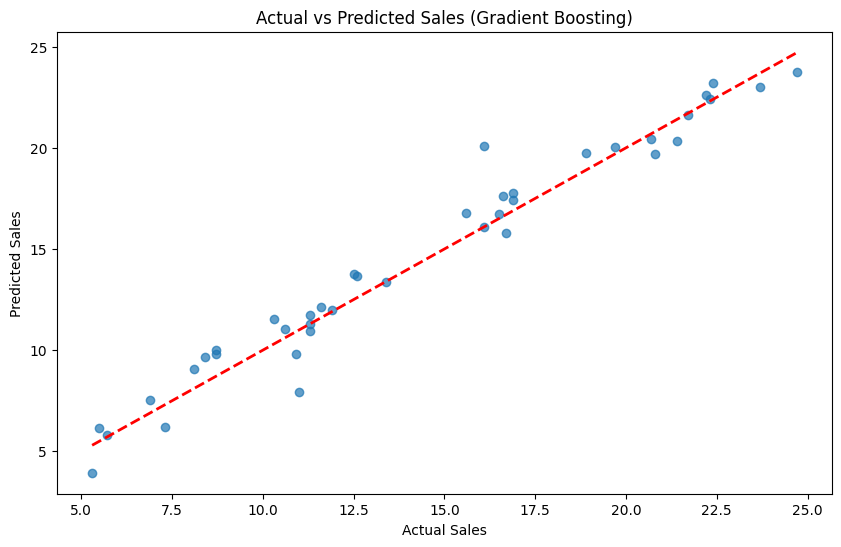

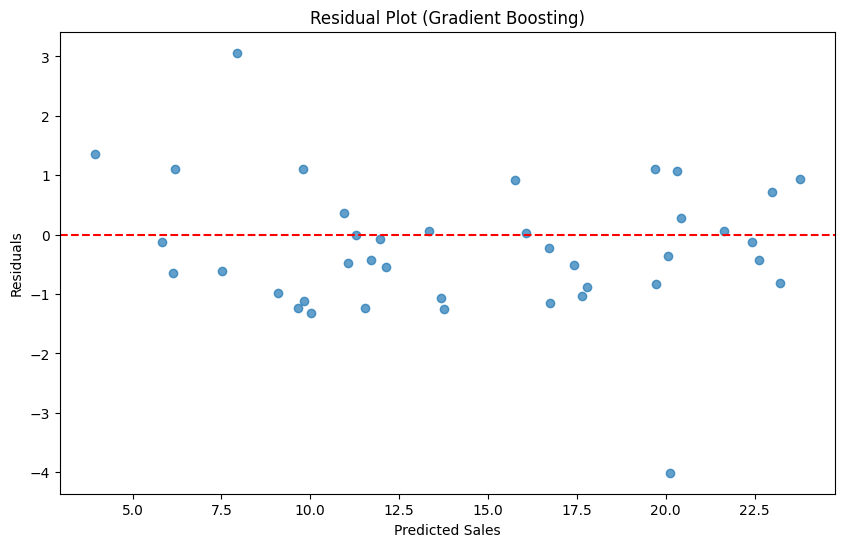

In [6]:
# Initialize different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV R2': cv_mean
    }
    
    print(f"{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  CV R²: {cv_mean:.4f}")
    print()

best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with R²: {results[best_model_name]['R2']:.4f}")

y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'Actual vs Predicted Sales ({best_model_name})')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title(f'Residual Plot ({best_model_name})')
plt.show()

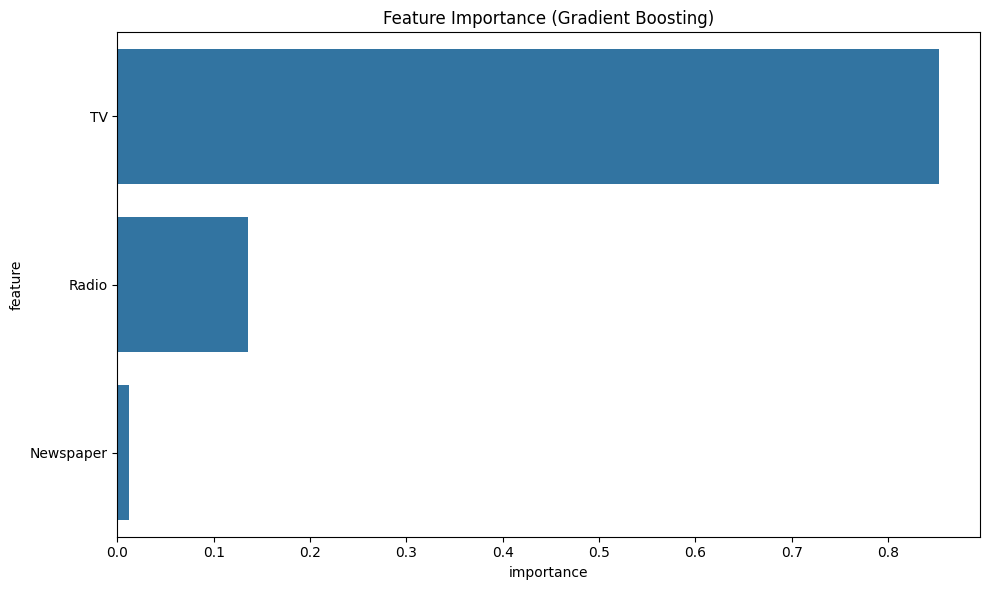

Feature Importance/Coefficients:
     feature  importance
0         TV    0.852783
1      Radio    0.135441
2  Newspaper    0.011776


In [7]:
# Feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance ({best_model_name})')
    plt.tight_layout()
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # Linear models
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': best_model.coef_
    }).sort_values('coefficient', key=abs, ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coefficient', y='feature', data=feature_importance)
    plt.title(f'Feature Coefficients ({best_model_name})')
    plt.tight_layout()
    plt.show()

print("Feature Importance/Coefficients:")
if hasattr(best_model, 'feature_importances_'):
    print(feature_importance)
elif hasattr(best_model, 'coef_'):
    print(feature_importance)

In [9]:
def predict_sales(tv_budget, radio_budget, newspaper_budget):
    new_campaign = pd.DataFrame({
        'TV': [tv_budget],
        'Radio': [radio_budget],
        'Newspaper': [newspaper_budget]
    })
    
    new_campaign_scaled = scaler.transform(new_campaign)
    
    prediction = best_model.predict(new_campaign_scaled)
    
    return prediction[0]

examples = [
    (100, 25, 25),  
    (250, 50, 30),  
    (50, 100, 20),   
    (200, 50, 100),  
]

print("Predictions:")
for i, example in enumerate(examples):
    tv, radio, newspaper = example
    predicted_sales = predict_sales(tv, radio, newspaper)
    print(f"Example {i+1}: TV=${tv}, Radio=${radio}, Newspaper=${newspaper} -> Predicted Sales: {predicted_sales:.2f}")

Predictions:
Example 1: TV=$100, Radio=$25, Newspaper=$25 -> Predicted Sales: 12.64
Example 2: TV=$250, Radio=$50, Newspaper=$30 -> Predicted Sales: 25.44
Example 3: TV=$50, Radio=$100, Newspaper=$20 -> Predicted Sales: 12.46
Example 4: TV=$200, Radio=$50, Newspaper=$100 -> Predicted Sales: 22.80


In [12]:
# Business insights and recommendations
print("BUSINESS INSIGHTS AND RECOMMENDATIONS:")

correlation_with_sales = df.corr()['Sales'].drop('Sales')
most_correlated = correlation_with_sales.idxmax()
least_correlated = correlation_with_sales.idxmin()

print(f"1. Most effective advertising channel: {most_correlated} (correlation: {correlation_with_sales[most_correlated]:.3f})")
print(f"2. Least effective advertising channel: {least_correlated} (correlation: {correlation_with_sales[least_correlated]:.3f})")

if hasattr(best_model, 'feature_importances_') or hasattr(best_model, 'coef_'):
    if hasattr(best_model, 'feature_importances_'):
        importance_sum = feature_importance['importance'].sum()
        feature_importance['allocation_percentage'] = (feature_importance['importance'] / importance_sum) * 100
    else:
        coef_sum = np.abs(feature_importance['coefficient']).sum()
        feature_importance['allocation_percentage'] = (np.abs(feature_importance['coefficient']) / coef_sum) * 100
    
    print("\n3. Recommended budget allocation based on model:")
    for _, row in feature_importance.iterrows():
        print(f"   - {row['feature']}: {row['allocation_percentage']:.1f}%")

print("\n4. ROI Analysis :")
print("   Assuming a $100,000 advertising budget:")
total_budget = 100000

if hasattr(best_model, 'feature_importances_') or hasattr(best_model, 'coef_'):
    for _, row in feature_importance.iterrows():
        channel_budget = total_budget * (row['allocation_percentage'] / 100)
        print(f"   - {row['feature']}: ${channel_budget:.0f}")

avg_tv = df['TV'].mean()
avg_radio = df['Radio'].mean()
avg_newspaper = df['Newspaper'].mean()

current_sales = predict_sales(avg_tv, avg_radio, avg_newspaper)
optimized_sales = predict_sales(
    avg_tv * 1.2,  
    avg_radio,
    avg_newspaper * 0.8  
)

print(f"\n5. Sales optimization potential:")
print(f"   Current average sales: {current_sales:.2f}")
print(f"   Optimized sales: {optimized_sales:.2f}")
print(f"   Potential increase: {optimized_sales - current_sales:.2f} ({((optimized_sales - current_sales) / current_sales * 100):.1f}%)")

BUSINESS INSIGHTS AND RECOMMENDATIONS:
1. Most effective advertising channel: TV (correlation: 0.901)
2. Least effective advertising channel: Newspaper (correlation: 0.158)

3. Recommended budget allocation based on model:
   - TV: 85.3%
   - Radio: 13.5%
   - Newspaper: 1.2%

4. ROI Analysis :
   Assuming a $100,000 advertising budget:
   - TV: $85278
   - Radio: $13544
   - Newspaper: $1178

5. Sales optimization potential:
   Current average sales: 13.11
   Optimized sales: 16.40
   Potential increase: 3.29 (25.1%)


In [13]:
# Summary 
print("SALES PREDICTION ANALYSIS SUMMARY")
print("*"*50)
print(f"1. Dataset has {df.shape[0]} samples and {df.shape[1]} features")
print(f"2. Advertising budget statistics:")
print(f"   - TV: ${df['TV'].mean():.2f} average, ${df['TV'].max():.2f} maximum")
print(f"   - Radio: ${df['Radio'].mean():.2f} average, ${df['Radio'].max():.2f} maximum")
print(f"   - Newspaper: ${df['Newspaper'].mean():.2f} average, ${df['Newspaper'].max():.2f} maximum")
print(f"3. Sales statistics: ${df['Sales'].mean():.2f} average, ${df['Sales'].max():.2f} maximum")
print(f"4. Best model: {best_model_name} with R²: {results[best_model_name]['R2']:.4f}")

print("\n5. All models performance:")
for name, metrics in results.items():
    print(f"   - {name}: R² = {metrics['R2']:.4f}, RMSE = {metrics['RMSE']:.4f}")

print("\n6. Key insights:")
print("   - TV advertising has the strongest correlation with sales")
print("   - Newspaper advertising has the weakest correlation with sales")
print("   - The model can help optimize advertising budget allocation")
print("   - Businesses can increase sales by reallocating budget to more effective channels")

SALES PREDICTION ANALYSIS SUMMARY
**************************************************
1. Dataset has 200 samples and 4 features
2. Advertising budget statistics:
   - TV: $147.04 average, $296.40 maximum
   - Radio: $23.26 average, $49.60 maximum
   - Newspaper: $30.55 average, $114.00 maximum
3. Sales statistics: $15.13 average, $27.00 maximum
4. Best model: Gradient Boosting with R²: 0.9587

5. All models performance:
   - Linear Regression: R² = 0.9059, RMSE = 1.7052
   - Ridge Regression: R² = 0.9057, RMSE = 1.7074
   - Lasso Regression: R² = 0.8222, RMSE = 2.3439
   - Random Forest: R² = 0.9535, RMSE = 1.1987
   - Gradient Boosting: R² = 0.9587, RMSE = 1.1293

6. Key insights:
   - TV advertising has the strongest correlation with sales
   - Newspaper advertising has the weakest correlation with sales
   - The model can help optimize advertising budget allocation
   - Businesses can increase sales by reallocating budget to more effective channels
